In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [2]:
data = pd.read_csv('../data_and_visualisation/HTRU_2.csv')
data.columns = ['Mean IP', 'Standard deviation IP', 'Excess kurtosis IP', 'Skewness IP',
                'Mean DS', 'Standard deviation DS', 'Excess kurtosis DS', 'Skewness DS',
                'Class']

In [3]:
data.describe()

,Mean IP,Standard deviation IP,Excess kurtosis IP,Skewness IP,Mean DS,Standard deviation DS,Excess kurtosis DS,Skewness DS,Class
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.00000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419,0.09158
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270,0.28844
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.00000
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119,0.00000
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996,0.00000
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905,0.00000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.00000


In [4]:
data.head()

,Mean IP,Standard deviation IP,Excess kurtosis IP,Skewness IP,Mean DS,Standard deviation DS,Excess kurtosis DS,Skewness DS,Class
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0


In [5]:
x = data.drop('Class', axis = 'columns')
y = data['Class']

In [6]:
x.describe()
#x.columns

,Mean IP,Standard deviation IP,Excess kurtosis IP,Skewness IP,Mean DS,Standard deviation DS,Excess kurtosis DS,Skewness DS
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y)

In [8]:
stablo = DecisionTreeClassifier(class_weight = {0: y[y == 0].size, 1: y[y == 0].size})
model = stablo.fit(x_train, y_train)

In [9]:
# pozajmicemo funkciju crtanja stabla sa casa

def plot_decision_tree(model, feature_names, max_depth = 0):
    plt.figure(figsize = (40, 20))
    if(max_depth == 0):
        plot_tree(model, class_names = ['0', '1'], feature_names = feature_names, filled = True)
        plt.title("Stablo odlucivanja dubine {} sa ukupno {} krajnjih cvorova"
                  .format(model.get_depth(), model.get_n_leaves(), max_depth))
    else:
        plot_tree(model, class_names = ['0', '1'], feature_names = feature_names, filled = True, max_depth = max_depth)
        plt.title("Stablo odlucivanja dubine {} sa ukupno {} krajnjih cvorova (prikazano je samo prva {} sloja)"
                  .format(model.get_depth(), model.get_n_leaves(), max_depth))
    plt.show()

<Figure size 432x288 with 0 Axes>

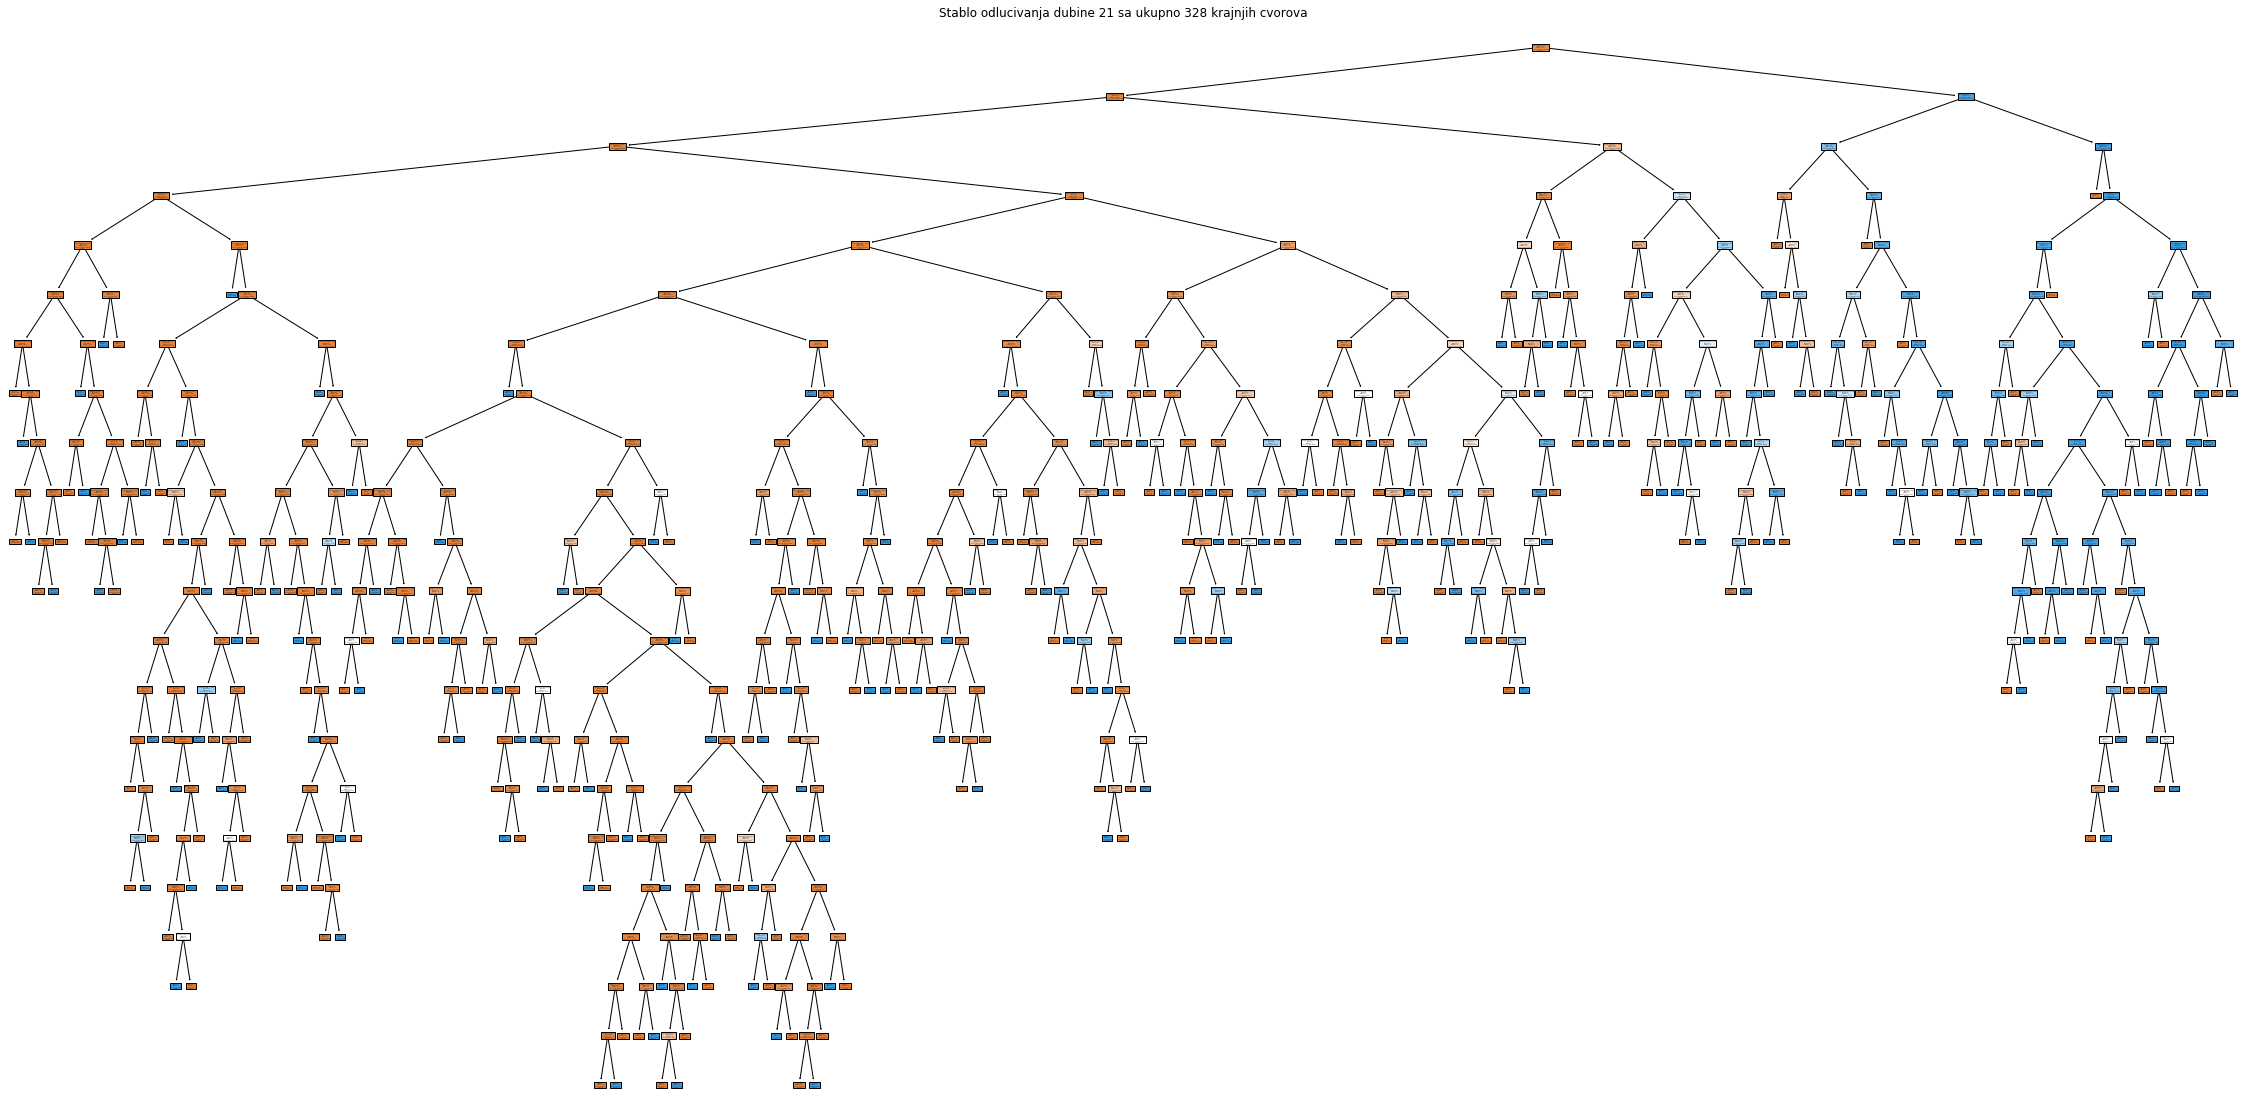

In [10]:
plt.figure()
plot_decision_tree(stablo, x.columns)
plt.show()

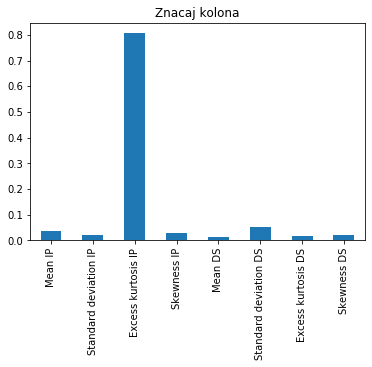

In [11]:
pd.Series(stablo.feature_importances_, index = x.columns).plot.bar()
plt.title("Znacaj kolona")
plt.show()
# vidimo da je najvise znacaja imala kolona
# koja je prilikom analize sirovih podataka imala najvecu korelaciju sa klasom
# i takodje jedina kojoj je presek unutrasnjih 50 kvantila pozitivne i negativne klase prazan skup

In [12]:
# funkcija za pravljenje matrice konfucije
def matConf(model, x, y):
    y_pred = model.predict(x)
    return confusion_matrix(y, y_pred)

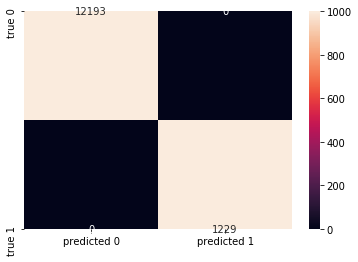

In [13]:
sb.heatmap(matConf(stablo, x_train, y_train), xticklabels = ["predicted 0", "predicted 1"], yticklabels = ["true 0", "true 1"], annot = True, fmt = 'g', vmin = 0, vmax = 1000)
# vidimo da je matrica konfuzije prilicno cista sto znaci da imamo savrsen model,
# ili verovatnije da je doslo to pretreniranja sto cemo proveriti test skupom

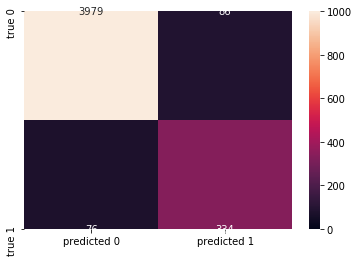

In [14]:
sb.heatmap(matConf(stablo, x_test, y_test), xticklabels = ["predicted 0", "predicted 1"], yticklabels = ["true 0", "true 1"], annot = True, fmt = 'g', vmin = 0, vmax = 1000)
# ovde vidimo da smo ipak pretrenirali

In [15]:
#sada bih pokusao da podesim hiperparametre
hiperparametri = {
    'max_depth': range(3, 11),
    'min_samples_split': range(0, 101, 20)[1:],
    'min_impurity_decrease': np.linspace(0.0, 1.0, 11)
}
tabla = GridSearchCV(stablo, hiperparametri)

In [16]:
tabla.fit(x_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight={0: 16258, 1: 16258},
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(3, 11),
                         'min_impurity_decrease': array([0. , 0

In [17]:
print("ispitano %d stabala" % len(tabla.cv_results_['params']))

ispitano 440 stabala


In [18]:
print("od toga %d kandidata" % np.count_nonzero(tabla.cv_results_['rank_test_score'] == 1))

od toga 1 kandidata


In [19]:
print("najboljih/a/i %d kandidata: \n" % np.count_nonzero(tabla.cv_results_['rank_test_score'] == 1))
rezultat = tabla.cv_results_
for i in range(1, np.count_nonzero(rezultat['rank_test_score'] == 1)+1):
    kandidati = np.flatnonzero(rezultat['rank_test_score'] == i)
    for kandidat in kandidati:
        print("Model broj {0}".format(i))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(rezultat['mean_test_score'][kandidat], rezultat['std_test_score'][kandidat]))
        print("Parameters: {0}".format(rezultat['params'][kandidat]))
        print("")

najboljih/a/i 1 kandidata: 

Model broj 1
Mean validation score: 0.978 (std: 0.001)
Parameters: {'max_depth': 4, 'min_impurity_decrease': 0.0, 'min_samples_split': 60}



In [20]:
novoStablo = DecisionTreeClassifier(class_weight = {0: y[y == 0].size, 1: y[y == 0].size}, max_depth = 4, min_impurity_decrease = 0.0, min_samples_split = 20)
noviModel = novoStablo.fit(x_train, y_train)


<Figure size 432x288 with 0 Axes>

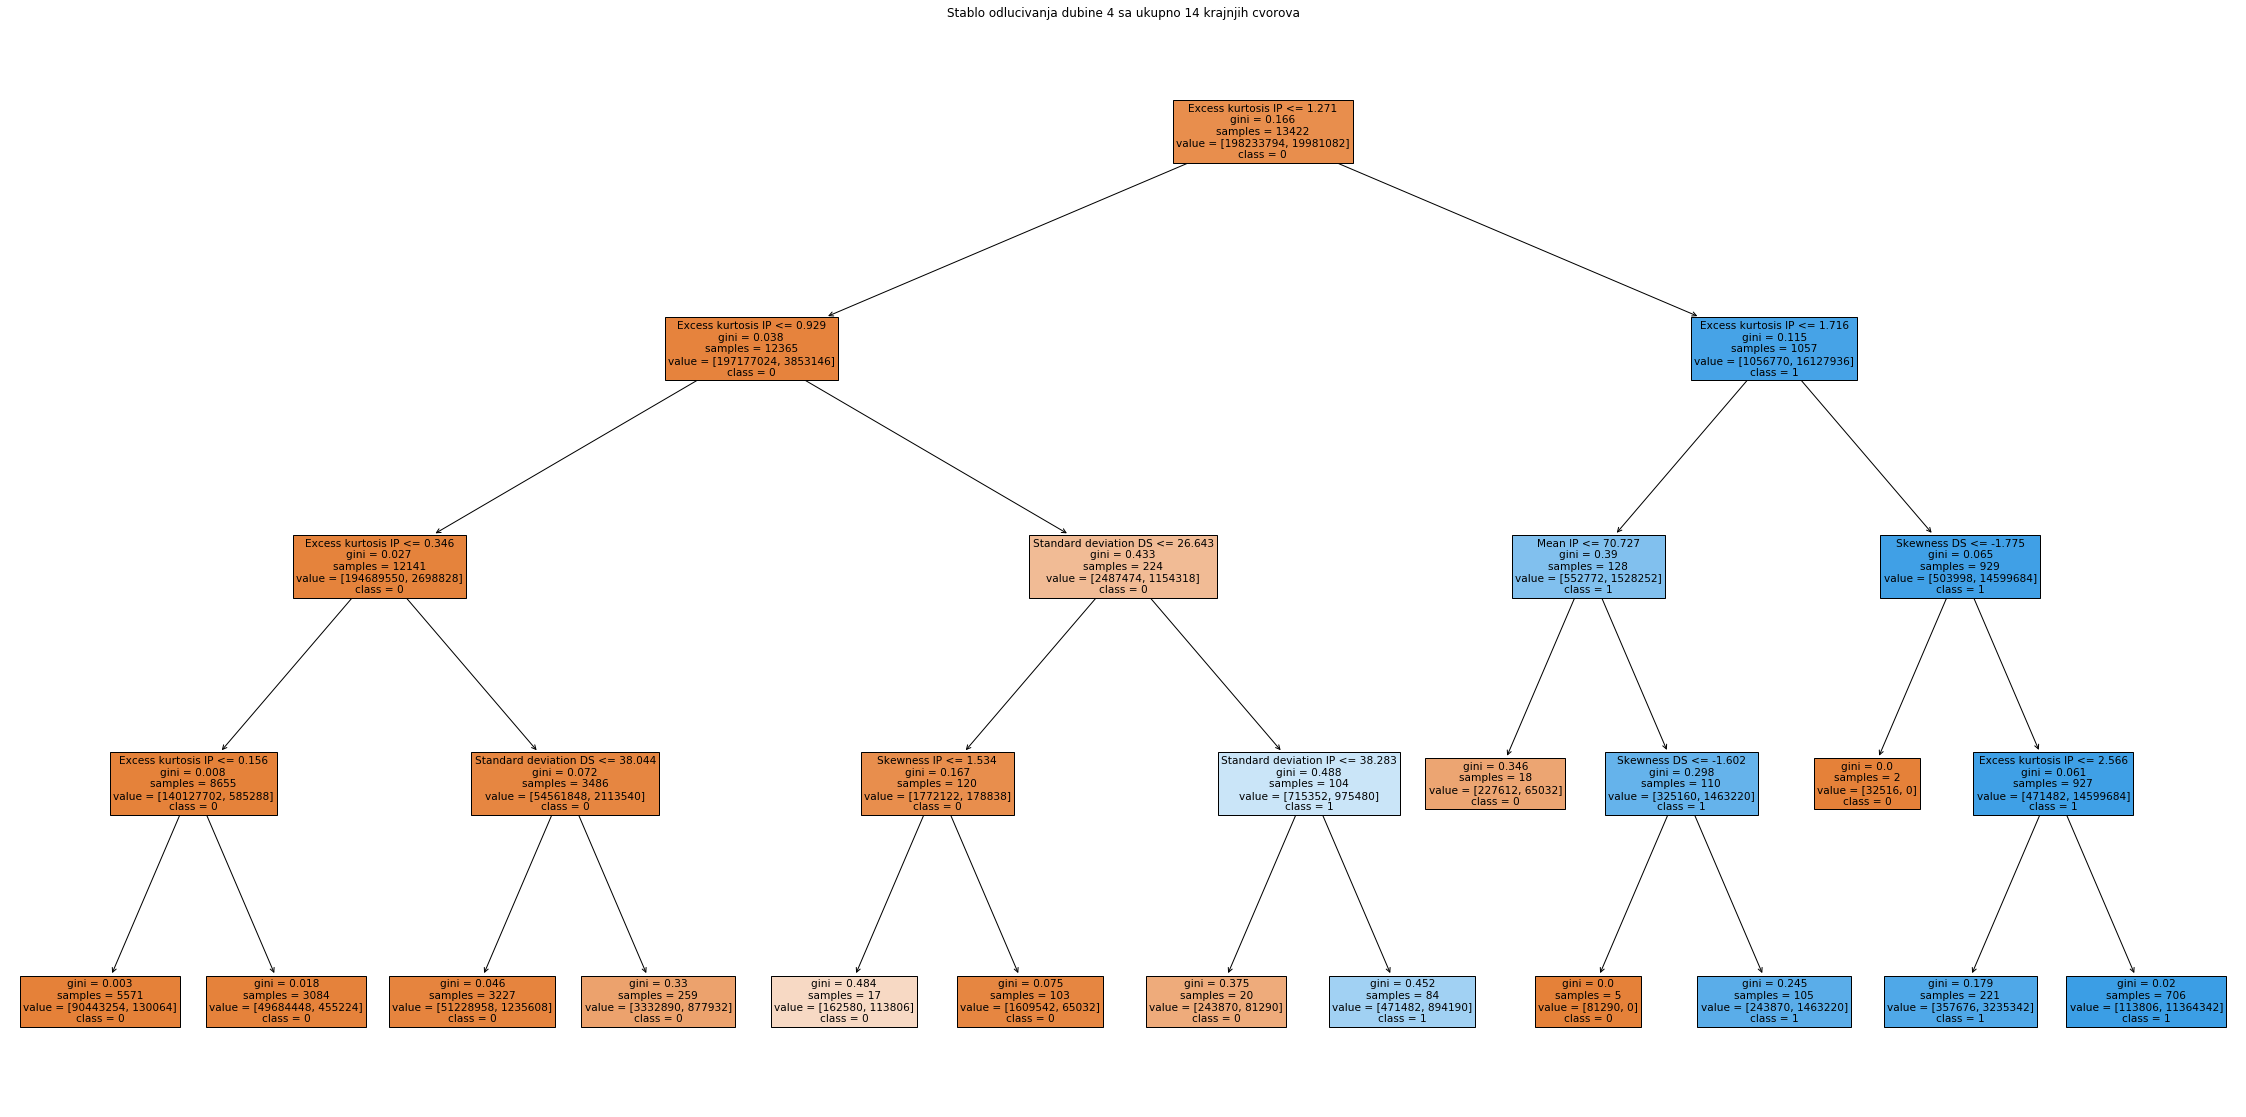

In [21]:
plt.figure()
plot_decision_tree(novoStablo, x.columns)
plt.show()

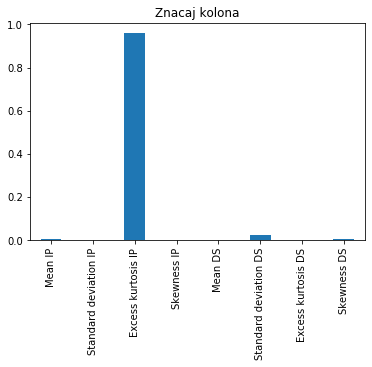

In [22]:
pd.Series(novoStablo.feature_importances_, index = x.columns).plot.bar()
plt.title("Znacaj kolona")
plt.show()

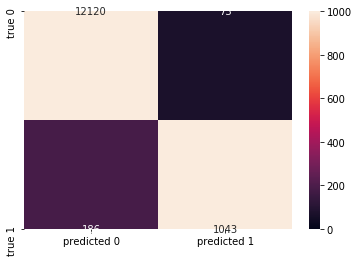

In [23]:
sb.heatmap(matConf(novoStablo, x_train, y_train), xticklabels = ["predicted 0", "predicted 1"], yticklabels = ["true 0", "true 1"], annot = True, fmt = 'g', vmin = 0, vmax = 1000)


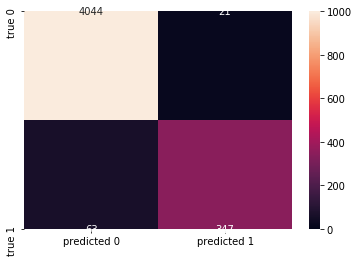

In [24]:
sb.heatmap(matConf(novoStablo, x_test, y_test), xticklabels = ["predicted 0", "predicted 1"], yticklabels = ["true 0", "true 1"], annot = True, fmt = 'g', vmin = 0, vmax = 1000)


In [25]:
y_predict = noviModel.predict(x_test)

Povrsina ispod krive: 0.9206


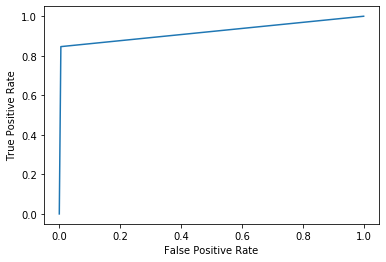

In [26]:
print("Povrsina ispod krive: %.4f" % roc_auc_score(y_test, y_predict))
fpr, tpr, _ = roc_curve(y_test, y_predict)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
#ovo je nesto cime smo prilicno zadovoljni, ja bih rekao

In [27]:
suma = RandomForestClassifier(n_jobs = -1, n_estimators = 25, class_weight = {0: y[y == 0].size, 1: y[y == 0].size})
model2 = suma.fit(x_train, y_train)

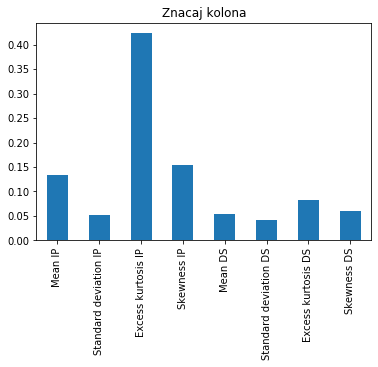

In [28]:
pd.Series(suma.feature_importances_, index = x.columns).plot.bar()
plt.title("Znacaj kolona")
plt.show()

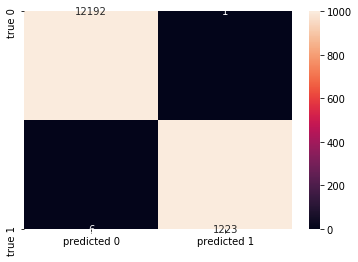

In [29]:
sb.heatmap(matConf(suma, x_train, y_train), xticklabels = ["predicted 0", "predicted 1"], yticklabels = ["true 0", "true 1"], annot = True, fmt = 'g', vmin = 0, vmax = 1000)


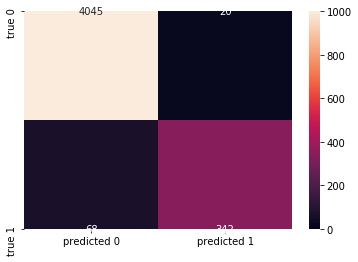

In [30]:
sb.heatmap(matConf(suma, x_test, y_test), xticklabels = ["predicted 0", "predicted 1"], yticklabels = ["true 0", "true 1"], annot = True, fmt = 'g', vmin = 0, vmax = 1000)


In [31]:
hiperparametri = {
    'max_depth': range(1, 15),
    'min_samples_split': range(0, 101, 20)[1:],
    'min_impurity_decrease': np.linspace(0.0, 1.0, 11)
}
tabla = GridSearchCV(suma, hiperparametri)

In [32]:
tabla.fit(x_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight={0: 16258, 1: 16258},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=25, n_jobs=-1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                    

In [33]:
print("ispitano %d stabala" % len(tabla.cv_results_['params']))

ispitano 770 stabala


In [34]:
print("od toga %d kandidata" % np.count_nonzero(tabla.cv_results_['rank_test_score'] == 1))

od toga 1 kandidata


In [35]:
print("najboljih/a/i %d kandidata: \n" % np.count_nonzero(tabla.cv_results_['rank_test_score'] == 1))
rezultat = tabla.cv_results_
for i in range(1, np.count_nonzero(rezultat['rank_test_score'] == 1)+1):
    kandidati = np.flatnonzero(rezultat['rank_test_score'] == i)
    for kandidat in kandidati:
        print("Model broj {0}".format(i))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(rezultat['mean_test_score'][kandidat], rezultat['std_test_score'][kandidat]))
        print("Parameters: {0}".format(rezultat['params'][kandidat]))
        print("")

najboljih/a/i 1 kandidata: 

Model broj 1
Mean validation score: 0.980 (std: 0.002)
Parameters: {'max_depth': 11, 'min_impurity_decrease': 0.0, 'min_samples_split': 20}



In [36]:
novaSuma = RandomForestClassifier(n_jobs = -1, n_estimators = 25, class_weight = {0: y[y == 0].size, 1: y[y == 0].size}, max_depth = 9, min_impurity_decrease = 0.0, min_samples_split = 40)
noviModel2 = novaSuma.fit(x_train, y_train)

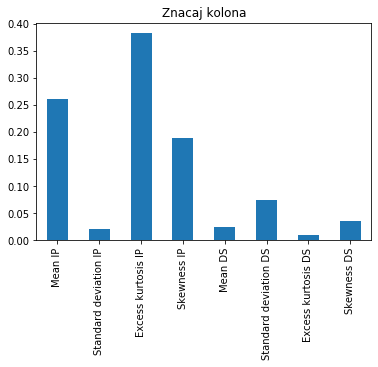

In [37]:
pd.Series(novaSuma.feature_importances_, index = x.columns).plot.bar()
plt.title("Znacaj kolona")
plt.show()

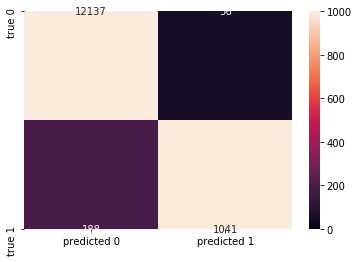

In [38]:
sb.heatmap(matConf(novaSuma, x_train, y_train), xticklabels = ["predicted 0", "predicted 1"], yticklabels = ["true 0", "true 1"], annot = True, fmt = 'g', vmin = 0, vmax = 1000)


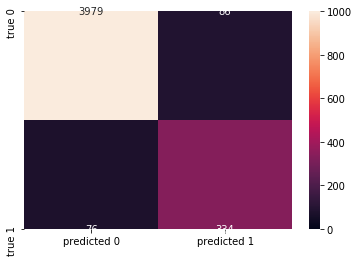

In [39]:
sb.heatmap(matConf(stablo, x_test, y_test), xticklabels = ["predicted 0", "predicted 1"], yticklabels = ["true 0", "true 1"], annot = True, fmt = 'g', vmin = 0, vmax = 1000)


In [40]:
y_predict = noviModel2.predict(x_test)

Povrsina ispod krive: 0.9053


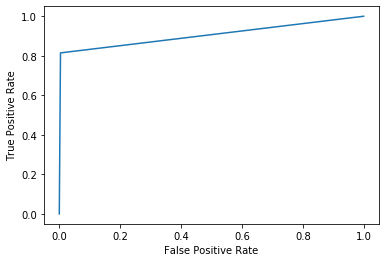

In [41]:
print("Povrsina ispod krive: %.4f" % roc_auc_score(y_test, y_predict))
fpr, tpr, _ = roc_curve(y_test, y_predict)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
#deluje kao da dobijamo gore rezultate nego obicnim drvetom